In [1]:
file=r"G:\Data_pyt\Diabetes.csv"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
db=pd.read_csv(file)

In [3]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207000179E8>,
      dtype=object)

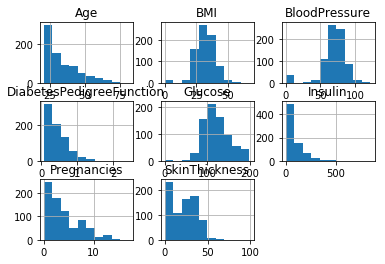

In [15]:
db[db.columns[:8]].hist()

In [5]:
for c in db.columns:
    if c not in['Pregnacies ','Outcome']:
        print('0 values in',c,':',sum(db[c]==0))

0 values in Pregnancies : 111
0 values in Glucose : 5
0 values in BloodPressure : 35
0 values in SkinThickness : 227
0 values in Insulin : 374
0 values in BMI : 11
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


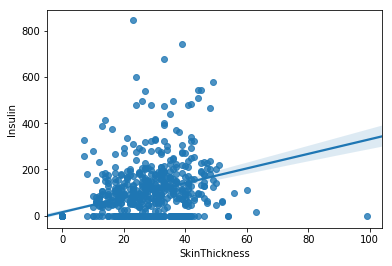

In [19]:
sns.regplot(x='SkinThickness',y='Insulin',data=db)

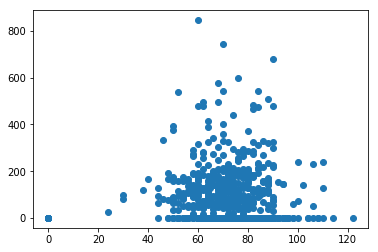

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x='BloodPressure',y='Insulin',data=db)

In [ ]:
corr=df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14,10))

## Fixing missing values


In [6]:
from sklearn.preprocessing import Imputer

In [7]:
imputer=Imputer(missing_values=0,strategy='median')

C:\Users\aksha.LAPTOP-KKEAULMJ\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
db[db.columns[1:8]]=pd.DataFrame(imputer.fit_transform(db[db.columns[1:8]]))

In [9]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
for c in db.columns:
    if c not in['Pregnancies ','Outcome']:
        print('0 values in',c,':',sum(db[c]==0))

0 values in Pregnancies : 111
0 values in Glucose : 0
0 values in BloodPressure : 0
0 values in SkinThickness : 0
0 values in Insulin : 0
0 values in BMI : 0
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(db[db.columns[0:8]])
db[db.columns[0:8]]=scaler.transform(db[db.columns[0:8]])

In [12]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.240305,0.152250,0.291518,0.168179,0.204015,0.348958
std,0.198210,0.196376,0.123435,0.095557,0.103826,0.140597,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.489796,0.239130,0.133413,0.288344,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
#X=db[db.columns[:7]] ##or 
X=db.iloc[:,:-1]
#y=db['Outcome'] or
y=db.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25)

In [14]:
!pip install vecstack

  Running setup.py bdist_wheel for vecstack: started
  Running setup.py bdist_wheel for vecstack: finished with status 'done'
  Stored in directory: C:\Users\aksha.LAPTOP-KKEAULMJ\AppData\Local\pip\Cache\wheels\35\6d\ca\bce17942bcf7c267b13c97c9c95e2f0ecf0b42160e6074f448
Successfully built vecstack


You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
from vecstack import stacking
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [48]:
from sklearn.tree import DecisionTreeClassifier

# creating the model
model = DecisionTreeClassifier()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.671003717472119
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       357
           1       0.51      0.52      0.52       181

    accuracy                           0.67       538
   macro avg       0.63      0.63      0.63       538
weighted avg       0.67      0.67      0.67       538

[[266  91]
 [ 86  95]]


In [24]:
### STACKING
from sklearn.metrics import accuracy_score

In [20]:
models=[KNeighborsClassifier(n_neighbors=5,
                            n_jobs=-1),
        RandomForestClassifier(random_state=0,n_jobs=-1,
                              n_estimators=100,max_depth=3),
        XGBClassifier(random_state=0,n_jobs=-1,learning_rate=0.1,
                     n_estimators=100,
                     max_depth=3)
       ] ## model is a list with 1st level classifier

### First level model

In [25]:
S_train,S_test =stacking(models,X_train,y_train,X_test,regression=False,mode='oof_pred_bag',
                        needs_proba=False, save_dir=None, metric=accuracy_score,n_folds=4,
                        stratified=True,shuffle=True,random_state=0,
                        verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.85416667]
    fold  1:  [0.83333333]
    fold  2:  [0.70833333]
    fold  3:  [0.70833333]
    ----
    MEAN:     [0.77604167] + [0.06810780]
    FULL:     [0.77604167]

model  1:     [RandomForestClassifier]
    fold  0:  [0.79166667]
    fold  1:  [0.81250000]
    fold  2:  [0.75000000]
    fold  3:  [0.70833333]
    ----
    MEAN:     [0.76562500] + [0.04000597]
    FULL:     [0.76562500]

model  2:     [XGBClassifier]
    fold  0:  [0.77083333]
    fold  1:  [0.87500000]
    fold  2:  [0.77083333]
    fold  3:  [0.77083333]
    ----
    MEAN:     [0.79687500] + [0.04510549]
    FULL:     [0.79687500]



### Second level modelling : To get better accuracy than 1st

In [26]:
model=XGBClassifier(random_state=0,n_jobs=-1,learning_rate=0.1,
                   n_estimators=100,max_depth=3)
model=model.fit(S_train,y_train)
y_pred=model.predict(S_test)
print('final prediction score:[%.8f]'% accuracy_score(y_test,y_pred))

final prediction score:[0.72569444]
